# Event Log Knowledge Graph (ELKG)

In [ ]:
# (auto-reload changes from imported libraries)
%load_ext autoreload
%autovaload 2

In [1]:
import pm4py
import pandas as pd
import subprocess

from rdflib import Namespace

## CCEL (XES)

In [ ]:
# - load XES

log = pm4py.read_xes("logs/xes/sepsis.xes")

### Convert XES into ELKG

In [ ]:
from convert_log import convert_xes_rdf, RdfRepresent

# convert_xes_rdf(log, "logs/xes/sepsis.ttl", Namespace("http://dutch.hospital.nl/sepsis#"), RdfRepresent.LINK_REIFIED)
convert_xes_rdf(log, "logs/xes/sepsis_pred.ttl", Namespace("http://dutch.hospital.nl/sepsis#"), RdfRepresent.LINK_PRED)

### Test queries

In [38]:
def run_query(query_file):
    cmd = f"eye n3/pqn_pred.n3 --turtle logs/xes/sepsis_pred.ttl --nope --query n3/queries/{query_file}"
    subprocess.run(cmd.split(" ")) 

In [39]:
# - get traces based on activity occurrence, sequential relations, and arbitrary constraints

run_query("sepsis_query.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/xes/sepsis_pred.ttl --nope --query n3/queries/sepsis_query.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 24 [msec cputime] 26 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/xes/sepsis_pred.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/xes/sepsis_pred.ttl --nope --query n3/queries/sepsis_query.n3

@prefix pq: <http://notation3.org/pqn#>.
@prefix ns2: <http://dutch.hospital.nl/sepsis#>.

pq:result pq:entry ns2:trace_NZ.
pq:result pq:entry ns2:trace_UC.
pq:result pq:entry ns2:trace_AD.
pq:result pq:entry ns2:trace_YF.
pq:result pq:entry ns2:trace_LG.
pq:result pq:entry ns2:trace_TN.
pq:result pq:entry ns2:trace_VN.
pq:result pq:entry ns2:trace_YX.
# 2024-08-22T21:31:26.575Z in=125263 out=8 ent=8 step=1147 brake=1 inf=5982873 sec=0.563 inf/sec=10626773
# ENDS



SC=125219
GET file:///Users/wvw/git/pm/ELKG/n3/queries/sepsis_query.n3 SC=1
networking 420 [msec cputime] 462 [msec walltime]
reasoning 119 [msec cputime] 121 [msec walltime]
2024-08-22T21:31:26.575Z in=125263 out=8 ent=8 step=1147 brake=1 inf=5982873 sec=0.563 inf/sec=10626773



## OCEL2

In [2]:
# - load OCEL2

log = pm4py.read_ocel2("logs/ocel2/ocel2-p2p.xml")

### Convert OCEL2 log into ELKG

In [ ]:
from convert_log import convert_ocel2_rdf

# # (full log)
# convert_ocel2_rdf(log, "logs/ocel2/ocel2-p2p.ttl", Namespace("http://ocel2.org/p2p#"))
# # (log subset with 5000 events)
# convert_ocel2_rdf(log, "logs/ocel2/ocel2-p2p-5000.ttl", Namespace("http://ocel2.org/p2p#"), 5000)
# (log subset with 10000 events)
convert_ocel2_rdf(log, "logs/ocel2/ocel2-p2p-10000.ttl", Namespace("http://ocel2.org/p2p#"), 10000)

### Flatten based on perspective

In [27]:
subset = 10000
pqn = "pqn_pred.n3"
suffix = "-pred"

In [15]:
# - extract traces from ELKG using perspective (defined in traces_query.n3)

cmd = f"eye n3/sort.n3 n3/traces/traces_collect.n3 --turtle logs/ocel2/ocel2-p2p-{subset}.ttl --query n3/traces/traces_query.n3 --nope --skolem-genid trace"

with open(f"logs/ocel2/ocel2-p2p-{subset}-traces{suffix}.ttl", "w") as out_file: # file to store traces
    subprocess.run(cmd.split(" "), stdout=out_file) 

eye --quiet n3/sort.n3 n3/traces/traces_collect.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl --query n3/traces/traces_query.n3 --nope --skolem-genid trace
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 24 [msec cputime] 26 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/sort.n3 SC=1
GET file:///Users/wvw/git/pm/ELKG/n3/traces/traces_collect.n3 SC=7
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl SC=206938
GET file:///Users/wvw/git/pm/ELKG/n3/traces/traces_query.n3 SC=1
networking 926 [msec cputime] 996 [msec walltime]
reasoning 65348 [msec cputime] 66285 [msec walltime]
2024-08-22T21:15:39.927Z in=206947 out=30621 ent=39972 step=9993 brake=2 inf=709902042 sec=66.298 inf/sec=10707744



In [16]:
# - drop incomplete traces (caused by our selection of subset of events)

cmd = f"eye n3/{pqn} --turtle logs/ocel2/ocel2-p2p-{subset}.ttl logs/ocel2/ocel2-p2p-{subset}-traces{suffix}.ttl --nope --query n3/traces/filter_complete_query.n3"

with open(f"logs/ocel2/ocel2-p2p-{subset}-traces{suffix}-complete.ttl", "w") as out_file: # file to store complete traces
    subprocess.run(cmd.split(" "), stdout=out_file) 

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces.ttl --nope --query n3/traces/filter_complete_query.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 29 [msec cputime] 50 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces.ttl SC=30621
GET file:///Users/wvw/git/pm/ELKG/n3/traces/filter_complete_query.n3 SC=1
networking 1967 [msec cputime] 2326 [msec walltime]
reasoning 10 [msec cputime] 10 [msec walltime]
2024-08-22T21:15:44.583Z in=237603 out=0 ent=0 step=0 brake=1 inf=29627980 sec=2.006 inf/sec=14769681



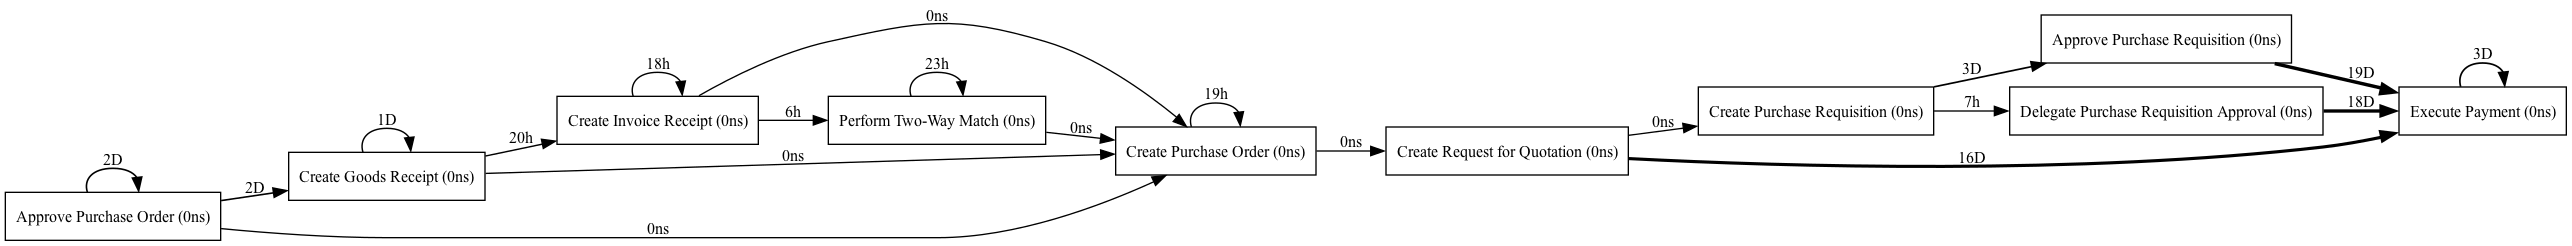

In [21]:
# - checkout DFG from extracted traces

import rdflib
from convert_log import convert_rdf_xes

g = rdflib.Graph()
g.parse(f"logs/ocel2/ocel2-p2p-{subset}-traces{suffix}.ttl")
g.parse(f"logs/ocel2/ocel2-p2p-{subset}.ttl")

g_log = convert_rdf_xes(g)

from pm4py.algo.discovery.dfg import algorithm as dfg_discovery
from pm4py.visualization.dfg import visualizer as dfg_visualizer

dfg = dfg_discovery.apply(g_log, variant=dfg_discovery.Variants.PERFORMANCE)
gviz = dfg_visualizer.apply(dfg, log=g_log, variant=dfg_visualizer.Variants.PERFORMANCE)
dfg_visualizer.view(gviz)

### Test queries

In [28]:
def run_query(query_file):
    cmd = f"eye n3/{pqn} --turtle logs/ocel2/ocel2-p2p-{subset}.ttl logs/ocel2/ocel2-p2p-{subset}-traces{suffix}-complete.ttl --nope --query n3/queries/{query_file}"
    subprocess.run(cmd.split(" ")) 

In [ ]:
# - get all events and their activities in a trace
# (n3/queries/trace_activities_query.n3)

# use to check output of next queries; e.g., lookup trace t_1
# update trace ID in n3/queries/trace_activities_query.n3

run_query("trace_activities_query.n3")

In [29]:
# - check event orderings
# (n3/queries/p2p_query1.n3)

run_query("p2p_query1.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query1.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 27 [msec cputime] 41 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query1.n3



SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl 

@prefix pq: <http://notation3.org/pqn#>.
@prefix skolem: <https://eyereasoner.github.io/.well-known/genid/trace#>.

pq:result pq:entry skolem:t_1.
pq:result pq:entry skolem:t_2.
pq:result pq:entry skolem:t_4.
pq:result pq:entry skolem:t_5.
pq:result pq:entry skolem:t_6.
pq:result pq:entry skolem:t_7.
pq:result pq:entry skolem:t_8.
pq:result pq:entry skolem:t_10.
pq:result pq:entry skolem:t_11.
pq:result pq:entry skolem:t_12.
pq:result pq:entry skolem:t_13.
pq:result pq:entry skolem:t_14.
pq:result pq:entry skolem:t_15.
pq:result pq:entry skolem:t_17.
pq:result pq:entry skolem:t_18.
pq:result pq:entry skolem:t_21.
pq:result pq:entry skolem:t_22.
pq:result pq:entry skolem:t_24.
pq:result pq:entry skolem:t_25.
pq:result pq:entry skolem:t_26.
pq:result pq:entry skolem:t_27.
pq:result pq:entry skolem:t_28.
pq:result pq:entry skolem:t_29.
pq:result pq:entry skolem:t_31.
pq:result pq:entry skolem:t_32.
pq:result pq:entry skolem:t_33.
pq:result pq:entry skolem:t_34.
pq:result pq:entry skolem:t

SC=15346
GET file:///Users/wvw/git/pm/ELKG/n3/queries/p2p_query1.n3 SC=1
networking 1333 [msec cputime] 1532 [msec walltime]
reasoning 30 [msec cputime] 31 [msec walltime]
2024-08-22T21:28:56.366Z in=222328 out=524 ent=524 step=4928 brake=1 inf=18236056 sec=1.390 inf/sec=13119465



In [30]:
# - maverick buying
# (n3/queries/p2p_query2.n3)

run_query("p2p_query2.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query2.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 28 [msec cputime] 45 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query2.n3



SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl 

@prefix pq: <http://notation3.org/pqn#>.
@prefix skolem: <https://eyereasoner.github.io/.well-known/genid/trace#>.

pq:result pq:entry skolem:t_149.
pq:result pq:entry skolem:t_154.
pq:result pq:entry skolem:t_163.
pq:result pq:entry skolem:t_185.
pq:result pq:entry skolem:t_194.
pq:result pq:entry skolem:t_197.
pq:result pq:entry skolem:t_203.
pq:result pq:entry skolem:t_212.
pq:result pq:entry skolem:t_217.
pq:result pq:entry skolem:t_226.
pq:result pq:entry skolem:t_235.
pq:result pq:entry skolem:t_242.
pq:result pq:entry skolem:t_250.
pq:result pq:entry skolem:t_251.
pq:result pq:entry skolem:t_261.
pq:result pq:entry skolem:t_269.
pq:result pq:entry skolem:t_270.
pq:result pq:entry skolem:t_276.
pq:result pq:entry skolem:t_280.
pq:result pq:entry skolem:t_282.
pq:result pq:entry skolem:t_292.
pq:result pq:entry skolem:t_303.
pq:result pq:entry skolem:t_308.
pq:result pq:entry skolem:t_317.
pq:result pq:entry skolem:t_322.
pq:result pq:entry skolem:t_323.
pq:result pq:entry skolem:

SC=15346
GET file:///Users/wvw/git/pm/ELKG/n3/queries/p2p_query2.n3 SC=1
networking 1370 [msec cputime] 1563 [msec walltime]
reasoning 16 [msec cputime] 17 [msec walltime]
2024-08-22T21:29:01.376Z in=222328 out=62 ent=62 step=62 brake=2 inf=17886614 sec=1.414 inf/sec=12649656



In [31]:
# - maverick buying (2)
# (n3/queries/p2p_query3.n3)

run_query("p2p_query3.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query3.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 24 [msec cputime] 26 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query3.n3



SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl 

# 2024-08-22T21:29:09.922Z in=222328 out=0 ent=0 step=0 brake=2 inf=18192202 sec=1.419 inf/sec=12820438
# ENDS



SC=15346
GET file:///Users/wvw/git/pm/ELKG/n3/queries/p2p_query3.n3 SC=1
networking 1351 [msec cputime] 1534 [msec walltime]
reasoning 44 [msec cputime] 45 [msec walltime]
2024-08-22T21:29:09.922Z in=222328 out=0 ent=0 step=0 brake=2 inf=18192202 sec=1.419 inf/sec=12820438



In [32]:
# - duplicate payments
# (n3/queries/p2p_query4.n3)

run_query("p2p_query4.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query4.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 28 [msec cputime] 33 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query4.n3



SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl 

@prefix pq: <http://notation3.org/pqn#>.
@prefix skolem: <https://eyereasoner.github.io/.well-known/genid/trace#>.

pq:result pq:entry (skolem:t_13 2).
pq:result pq:entry (skolem:t_26 2).
pq:result pq:entry (skolem:t_29 2).
pq:result pq:entry (skolem:t_32 2).
pq:result pq:entry (skolem:t_46 2).
pq:result pq:entry (skolem:t_51 4).
pq:result pq:entry (skolem:t_56 2).
pq:result pq:entry (skolem:t_65 3).
pq:result pq:entry (skolem:t_85 2).
pq:result pq:entry (skolem:t_99 2).
pq:result pq:entry (skolem:t_108 2).
pq:result pq:entry (skolem:t_119 2).
pq:result pq:entry (skolem:t_130 2).
pq:result pq:entry (skolem:t_131 2).
pq:result pq:entry (skolem:t_132 2).
pq:result pq:entry (skolem:t_134 3).
pq:result pq:entry (skolem:t_136 2).
pq:result pq:entry (skolem:t_146 2).
pq:result pq:entry (skolem:t_150 2).
pq:result pq:entry (skolem:t_151 4).
pq:result pq:entry (skolem:t_160 2).
pq:result pq:entry (skolem:t_168 3).
pq:result pq:entry (skolem:t_171 2).
pq:result pq:entry (skolem:t_172 2).
pq:res

SC=15346
GET file:///Users/wvw/git/pm/ELKG/n3/queries/p2p_query4.n3 SC=1
networking 1357 [msec cputime] 1538 [msec walltime]
reasoning 19 [msec cputime] 19 [msec walltime]
2024-08-22T21:29:13.360Z in=222328 out=116 ent=116 step=116 brake=2 inf=17830592 sec=1.404 inf/sec=12699852



In [33]:
# - lengthy approval process
# (n3/queries/p2p_query5.n3)

run_query("p2p_query5.n3")

eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query5.n3
EYE v10.17.3 (2024-08-07)
SWI-Prolog version 9.0.4
starting 24 [msec cputime] 26 [msec walltime]
GET file:///Users/wvw/git/pm/ELKG/n3/pqn_pred.n3 SC=43
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000.ttl 

# Processed by EYE v10.17.3 (2024-08-07)
# eye --quiet n3/pqn_pred.n3 --turtle logs/ocel2/ocel2-p2p-10000.ttl logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl --nope --query n3/queries/p2p_query5.n3



SC=206938
GET file:///Users/wvw/git/pm/ELKG/logs/ocel2/ocel2-p2p-10000-traces-pred-complete.ttl 

@prefix pq: <http://notation3.org/pqn#>.
@prefix skolem: <https://eyereasoner.github.io/.well-known/genid/trace#>.
@prefix p2: <http://ocel2.org/p2p#>.

pq:result pq:entry (skolem:t_6 p2:event:3884 p2:event:4084 170).
pq:result pq:entry (skolem:t_7 p2:event:3863 p2:event:4094 214).
pq:result pq:entry (skolem:t_12 p2:event:4754 p2:event:5169 219).
pq:result pq:entry (skolem:t_15 p2:event:5336 p2:event:5792 192).
pq:result pq:entry (skolem:t_32 p2:event:7733 p2:event:7880 215).
pq:result pq:entry (skolem:t_41 p2:event:8818 p2:event:9046 211).
pq:result pq:entry (skolem:t_44 p2:event:9006 p2:event:9334 207).
pq:result pq:entry (skolem:t_46 p2:event:9116 p2:event:9607 271).
pq:result pq:entry (skolem:t_49 p2:event:9806 p2:event:10195 251).
pq:result pq:entry (skolem:t_51 p2:event:9889 p2:event:10412 292).
pq:result pq:entry (skolem:t_52 p2:event:9887 p2:event:10177 177).
pq:result pq:entry (skolem:t_56 p2:event:10022 p2:event:10465 230).
pq:result pq:entry (skolem:t_63 p2:event:11902 p2:ev

SC=15346
GET file:///Users/wvw/git/pm/ELKG/n3/queries/p2p_query5.n3 SC=1
networking 1356 [msec cputime] 1538 [msec walltime]
reasoning 71 [msec cputime] 73 [msec walltime]
2024-08-22T21:29:21.131Z in=222328 out=102 ent=102 step=102 brake=1 inf=18701768 sec=1.452 inf/sec=12880006

